In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('BA_predictor_clean.csv')

In [4]:
data.head(3)

,ID,Kasai age,post.1wk T.bil,post.1wk D.bil,post.1wk GGT,pre.Kop GGT,pre.Kop T.bil,pre.Kop D.bil,Gender,Jfree,...,splenomegaly,ascites,EV/GV,GI bleeding,cholangitis,JF-NLS,LTx,LTx or Death,pre-LTx,NLS
0,3866259,118,7.9,5.4,617.0,617.0,5.40,4.2,0,1,...,1,1,1,1,0,3,1,1,1,16
1,3989726,79,4.8,3.1,520.0,704.0,6.23,5.1,0,1,...,1,1,1,1,1,173,1,1,1,180
2,4095986,40,7.0,4.5,1058.0,NaN,5.28,4.0,1,0,...,1,1,0,0,1,0,1,1,1,5


In [5]:
data.mean()

ID                       5.567481e+06
Kasai age                5.285185e+01
post.1wk T.bil           6.012469e+00
post.1wk D.bil           3.920875e+00
post.1wk GGT             5.659296e+02
pre.Kop GGT              5.217733e+02
pre.Kop T.bil            8.440506e+00
pre.Kop D.bil            5.399494e+00
Gender                   4.320988e-01
Jfree                    7.160494e-01
Jfree in 3months         5.061728e-01
follow up time           4.512346e+01
post-op juandice time    1.449753e+02
splenomegaly             6.296296e-01
ascites                  3.086420e-01
EV/GV                    3.456790e-01
GI bleeding              2.716049e-01
cholangitis              5.061728e-01
JF-NLS                   3.632099e+01
LTx                      4.691358e-01
LTx or Death             5.061728e-01
pre-LTx                  5.432099e-01
NLS                      4.638272e+01
dtype: float64

In [6]:
data = data.fillna(data.mean())

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 23 columns):
ID                       81 non-null int64
Kasai age                81 non-null int64
post.1wk T.bil           81 non-null float64
post.1wk D.bil           81 non-null float64
post.1wk GGT             81 non-null float64
pre.Kop GGT              81 non-null float64
pre.Kop T.bil            81 non-null float64
pre.Kop D.bil            81 non-null float64
Gender                   81 non-null int64
Jfree                    81 non-null int64
Jfree in 3months         81 non-null int64
follow up time           81 non-null int64
post-op juandice time    81 non-null int64
splenomegaly             81 non-null int64
ascites                  81 non-null int64
EV/GV                    81 non-null int64
GI bleeding              81 non-null int64
cholangitis              81 non-null int64
JF-NLS                   81 non-null int64
LTx                      81 non-null int64
LTx or Death             

In [8]:
data.describe()

,ID,Kasai age,post.1wk T.bil,post.1wk D.bil,post.1wk GGT,pre.Kop GGT,pre.Kop T.bil,pre.Kop D.bil,Gender,Jfree,...,splenomegaly,ascites,EV/GV,GI bleeding,cholangitis,JF-NLS,LTx,LTx or Death,pre-LTx,NLS
count,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,5.567481e+06,52.851852,6.012469,3.920875,565.929577,521.773333,8.440506,5.399494,0.432099,0.716049,...,0.629630,0.308642,0.345679,0.271605,0.506173,36.320988,0.469136,0.506173,0.543210,46.382716
std,7.366465e+05,21.374699,3.168630,1.892292,378.562159,433.924924,2.579558,1.993644,0.498454,0.453723,...,0.485913,0.464811,0.478552,0.447559,0.503077,48.870704,0.502156,0.503077,0.501233,49.058528
min,3.866259e+06,15.000000,2.260000,1.360000,119.000000,63.000000,3.570000,0.460000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,5.181938e+06,39.000000,4.310000,2.820000,298.000000,264.000000,6.710000,4.090000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,5.747888e+06,51.000000,5.390000,3.620000,565.929577,445.000000,8.310000,5.300000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,1.000000,1.000000,21.000000
75%,6.142182e+06,64.000000,6.850000,4.530000,706.000000,626.000000,9.830000,6.230000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,1.000000,1.000000,1.000000,76.000000
max,6.545138e+06,118.000000,21.720000,14.750000,2461.000000,3340.000000,19.080000,12.400000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,174.000000,1.000000,1.000000,1.000000,180.000000


In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.05)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 1 to 20
Data columns (total 23 columns):
ID                       76 non-null int64
Kasai age                76 non-null int64
post.1wk T.bil           76 non-null float64
post.1wk D.bil           76 non-null float64
post.1wk GGT             76 non-null float64
pre.Kop GGT              76 non-null float64
pre.Kop T.bil            76 non-null float64
pre.Kop D.bil            76 non-null float64
Gender                   76 non-null int64
Jfree                    76 non-null int64
Jfree in 3months         76 non-null int64
follow up time           76 non-null int64
post-op juandice time    76 non-null int64
splenomegaly             76 non-null int64
ascites                  76 non-null int64
EV/GV                    76 non-null int64
GI bleeding              76 non-null int64
cholangitis              76 non-null int64
JF-NLS                   76 non-null int64
LTx                      76 non-null int64
LTx or Death             

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 28 to 43
Data columns (total 23 columns):
ID                       5 non-null int64
Kasai age                5 non-null int64
post.1wk T.bil           5 non-null float64
post.1wk D.bil           5 non-null float64
post.1wk GGT             5 non-null float64
pre.Kop GGT              5 non-null float64
pre.Kop T.bil            5 non-null float64
pre.Kop D.bil            5 non-null float64
Gender                   5 non-null int64
Jfree                    5 non-null int64
Jfree in 3months         5 non-null int64
follow up time           5 non-null int64
post-op juandice time    5 non-null int64
splenomegaly             5 non-null int64
ascites                  5 non-null int64
EV/GV                    5 non-null int64
GI bleeding              5 non-null int64
cholangitis              5 non-null int64
JF-NLS                   5 non-null int64
LTx                      5 non-null int64
LTx or Death             5 non-null int64
pre

In [12]:
train.describe()

,ID,Kasai age,post.1wk T.bil,post.1wk D.bil,post.1wk GGT,pre.Kop GGT,pre.Kop T.bil,pre.Kop D.bil,Gender,Jfree,...,splenomegaly,ascites,EV/GV,GI bleeding,cholangitis,JF-NLS,LTx,LTx or Death,pre-LTx,NLS
count,7.600000e+01,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,...,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,5.567077e+06,52.947368,6.009211,3.911196,568.872313,520.179474,8.502119,5.415908,0.434211,0.723684,...,0.618421,0.328947,0.342105,0.276316,0.513158,37.144737,0.486842,0.526316,0.552632,47.381579
std,7.435691e+05,21.967184,3.228167,1.911923,387.024169,447.011251,2.618521,2.034696,0.498946,0.450146,...,0.489002,0.472953,0.477567,0.450146,0.503148,49.085423,0.503148,0.502625,0.500526,49.297456
min,3.866259e+06,15.000000,2.260000,1.360000,119.000000,63.000000,3.570000,0.460000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,5.168878e+06,38.500000,4.297500,2.807500,296.500000,251.750000,6.682500,4.067500,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,5.748444e+06,51.000000,5.370000,3.575000,565.929577,426.500000,8.375253,5.235000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,12.500000,0.000000,1.000000,1.000000,21.500000
75%,6.144049e+06,67.000000,6.887500,4.542500,728.000000,628.500000,9.845000,6.315000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,64.500000,1.000000,1.000000,1.000000,78.000000
max,6.545138e+06,118.000000,21.720000,14.750000,2461.000000,3340.000000,19.080000,12.400000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,174.000000,1.000000,1.000000,1.000000,180.000000


In [13]:
def remove_outlier(data, entry):
    new_data = data[np.abs(data[entry]-data[entry].mean())<=(3*data[entry].std())]
    print ("Shape Of The After Remove Ouliers from {}: {}".format(e, data.shape))
    return new_data

In [14]:
for e in list(train.columns.values):
    train = remove_outlier(train, e)

Shape Of The After Remove Ouliers from ID: (76, 23)
Shape Of The After Remove Ouliers from Kasai age: (76, 23)
Shape Of The After Remove Ouliers from post.1wk T.bil: (76, 23)
Shape Of The After Remove Ouliers from post.1wk D.bil: (74, 23)
Shape Of The After Remove Ouliers from post.1wk GGT: (74, 23)
Shape Of The After Remove Ouliers from pre.Kop GGT: (73, 23)
Shape Of The After Remove Ouliers from pre.Kop T.bil: (71, 23)
Shape Of The After Remove Ouliers from pre.Kop D.bil: (71, 23)
Shape Of The After Remove Ouliers from Gender: (70, 23)
Shape Of The After Remove Ouliers from Jfree: (70, 23)
Shape Of The After Remove Ouliers from Jfree in 3months: (70, 23)
Shape Of The After Remove Ouliers from follow up time: (70, 23)
Shape Of The After Remove Ouliers from post-op juandice time: (70, 23)
Shape Of The After Remove Ouliers from splenomegaly: (69, 23)
Shape Of The After Remove Ouliers from ascites: (69, 23)
Shape Of The After Remove Ouliers from EV/GV: (69, 23)
Shape Of The After Remove 

[Text(0.5, 0, 'pre.Kop GGT'), Text(0.5, 1.0, 'distribution of pre.Kop GGT')]

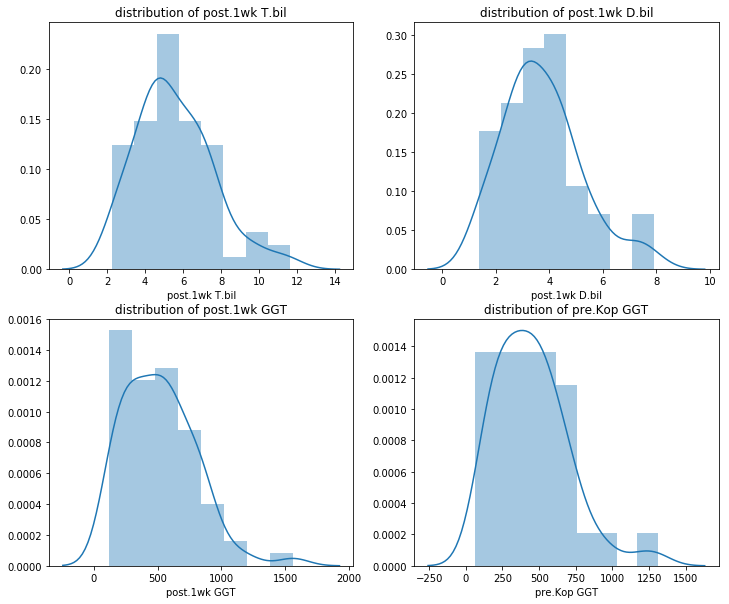

In [15]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.distplot(train["post.1wk T.bil"],ax=axes[0][0])
sns.distplot(train["post.1wk D.bil"],ax=axes[0][1])
sns.distplot(train["post.1wk GGT"],ax=axes[1][0])
sns.distplot(train["pre.Kop GGT"],ax=axes[1][1])

axes[0][0].set(xlabel='post.1wk T.bil',title="distribution of post.1wk T.bil")
axes[0][1].set(xlabel='post.1wk D.bil',title="distribution of post.1wk D.bil")
axes[1][0].set(xlabel='post.1wk GGT',title="distribution of post.1wk GGT")
axes[1][1].set(xlabel='pre.Kop GGT',title="distribution of pre.Kop GGT")

In [16]:
list(train.columns.values)

['ID',
 'Kasai age',
 'post.1wk T.bil',
 'post.1wk D.bil',
 'post.1wk GGT',
 'pre.Kop GGT',
 'pre.Kop T.bil',
 'pre.Kop D.bil',
 'Gender',
 'Jfree',
 'Jfree in 3months',
 'follow up time',
 'post-op juandice time',
 'splenomegaly',
 'ascites',
 'EV/GV',
 'GI bleeding',
 'cholangitis',
 'JF-NLS',
 'LTx',
 'LTx or Death',
 'pre-LTx',
 'NLS']

In [17]:
xColumns = ['ID',
 'Kasai age',
 'post.1wk T.bil',
 'post.1wk D.bil',
 'post.1wk GGT',
 'pre.Kop GGT',
 'pre.Kop T.bil',
 'pre.Kop D.bil',
 'Gender',
 'Jfree',
 'Jfree in 3months',
 'follow up time',
 'post-op juandice time',
 'splenomegaly',
 'ascites',
 'EV/GV',
 'GI bleeding',
 'cholangitis']

In [92]:
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree

In [96]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [101]:
def predict(train, test, y_entry):
    dtc = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    train_x = train[xColumns]
    train_y = train[y_entry]
    test_x = test[xColumns]
    test_y = test[y_entry]
    dtc.fit(train_x, train_y)
    # export the learned decision tree
    dot_data = tree.export_graphviz(dtc, out_file=None,
                         feature_names=xColumns,
                         filled=True, rounded=True,
                         special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render(y_entry) # tree saved to wine.pdf
    print('train accuracy = {:f}'.format(np.sum(dtc.predict(train_x) == train_y.values) / len(train_y)))
    print(dtc.predict(test_x))
    print(test_y.values)
    print('test accuracy = {:f}'.format(np.sum(dtc.predict(test_x) == test_y.values) / len(test_y)))

In [102]:
predict(train, test, 'LTx')

train accuracy = 1.000000
[0 1 1 1 1]
[0 1 0 0 0]
test accuracy = 0.400000


In [103]:
predict(train, test, 'LTx or Death')

train accuracy = 1.000000
[0 1 1 1 1]
[0 1 0 0 0]
test accuracy = 0.400000


In [104]:
predict(train, test, 'pre-LTx')

train accuracy = 1.000000
[0 1 1 1 1]
[0 1 1 0 0]
test accuracy = 0.600000


In [105]:
predict(train, test, 'NLS')

train accuracy = 1.000000
[94 11 11  7 14]
[116  11  11   4  14]
test accuracy = 0.600000


In [106]:
predict(train, test, 'JF-NLS')

train accuracy = 1.000000
[122   0   7   0   0]
[111   2   6   0   0]
test accuracy = 0.400000


In [36]:
print('accuracy = {:f}'.format(np.sum(tree.predict(test_x) == test_y.values) / len(test_y)))

accuracy = 0.400000


In [122]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
def forest_predict(train, test, y_entry):
    rf = RandomForestRegressor(n_estimators=30, random_state=0)
    train_x = train[xColumns]
    train_y = train[y_entry]
    test_x = test[xColumns]
    test_y = test[y_entry]
    rf.fit(train_x, train_y)
    print('train accuracy = {:f}'.format(np.sum(rf.predict(train_x) == train_y.values) / len(train_y)))
    print(rf.predict(train_x))
    print(train_y.values)
    print('test accuracy = {:f}'.format(np.sum(rf.predict(test_x) == test_y.values) / len(test_y)))
    print(rf.predict(test_x))
    print(test_y.values)
    

In [123]:
forest_predict(train, test, 'LTx')

train accuracy = 0.434783
[0.8        0.1        0.03333333 0.96666667 1.         0.1
 1.         0.8        0.76666667 0.06666667 0.86666667 0.63333333
 0.06666667 0.5        1.         0.         0.         0.03333333
 0.23333333 1.         0.         1.         0.33333333 0.03333333
 1.         1.         0.2        0.1        0.         0.76666667
 1.         0.13333333 1.         0.         0.         0.
 0.93333333 1.         1.         1.         0.         0.13333333
 0.13333333 1.         0.56666667 0.03333333 0.86666667 0.06666667
 1.         1.         1.         0.86666667 1.         0.66666667
 1.         0.16666667 0.16666667 1.         0.36666667 1.
 0.06666667 0.         0.96666667 0.06666667 0.03333333 0.23333333
 0.06666667 0.96666667 1.        ]
[1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1
 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1]
test accuracy = 0.400000
[0.         1.         0.96666667 1.         0.9       ]
[0

In [124]:
forest_predict(train, test, 'LTx or Death')

train accuracy = 0.507246
[0.86666667 0.1        0.03333333 0.96666667 1.         0.06666667
 1.         0.83333333 0.83333333 0.06666667 0.96666667 0.63333333
 0.06666667 1.         1.         0.         0.         0.03333333
 0.13333333 1.         0.         1.         0.36666667 0.03333333
 1.         1.         0.2        0.1        0.         1.
 1.         0.13333333 1.         0.         0.         0.
 0.96666667 1.         1.         1.         0.03333333 0.13333333
 0.16666667 1.         0.56666667 0.03333333 0.96666667 0.06666667
 1.         1.         1.         1.         1.         0.7
 1.         0.2        0.16666667 1.         1.         1.
 0.03333333 0.         1.         0.06666667 0.06666667 0.26666667
 0.06666667 1.         1.        ]
[1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1
 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1]
test accuracy = 0.200000
[0.         0.96666667 0.96666667 1.         1.        ]
[0 1 0 0 0

In [125]:
forest_predict(train, test, 'pre-LTx')

train accuracy = 0.478261
[0.83333333 0.03333333 0.         1.         1.         0.23333333
 1.         0.83333333 0.83333333 0.26666667 0.96666667 0.6
 0.06666667 1.         1.         0.13333333 0.         0.1
 0.23333333 1.         0.         1.         0.36666667 0.2
 1.         1.         0.3        0.2        0.03333333 1.
 1.         0.26666667 1.         0.06666667 0.03333333 0.03333333
 1.         1.         1.         1.         0.73333333 0.13333333
 0.13333333 0.96666667 0.73333333 0.06666667 0.96666667 0.93333333
 1.         1.         1.         1.         1.         0.83333333
 1.         0.06666667 0.3        1.         1.         1.
 0.7        0.         1.         0.03333333 0.         0.2
 0.16666667 1.         1.        ]
[1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1
 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1]
test accuracy = 0.200000
[0.         0.96666667 0.96666667 1.         1.        ]
[0 1 1 0 0]


In [126]:
forest_predict(train, test, 'NLS')

train accuracy = 0.028986
[168.8        163.36666667 122.6         13.43333333  11.06666667
  32.76666667   8.06666667  18.56666667  18.66666667 104.7
  70.76666667 115.63333333 163.13333333  11.8         17.23333333
  89.73333333  65.86666667  54.56666667  95.93333333   9.73333333
  25.33333333   5.83333333  19.4         91.2         29.06666667
   8.93333333 138.66666667  22.8         64.43333333   8.86666667
  11.86666667  20.76666667   7.33333333  93.43333333  32.13333333
  25.66666667  12.06666667  17.26666667  10.43333333   7.06666667
 120.6         21.03333333  25.73333333  16.8         51.73333333
  54.23333333  11.7         33.03333333  17.23333333   8.1
  10.7         10.96666667   8.1         31.86666667  11.6
 173.66666667 127.8          8.93333333  12.          28.16666667
  89.03333333  57.13333333  17.76666667  87.1         61.2
  88.06666667  42.6         18.46666667   8.        ]
[180 163 126  12  11  33   8  16  15 105  96 111 162  12  14  89  67  58
  98  10  27   5 

In [127]:
forest_predict(train, test, 'JF-NLS')

train accuracy = 0.159420
[1.61300000e+02 1.54300000e+02 1.20366667e+02 3.10000000e+00
 5.43333333e+00 2.57666667e+01 0.00000000e+00 3.03333333e+00
 1.20000000e+00 8.58000000e+01 0.00000000e+00 1.15733333e+02
 1.54900000e+02 0.00000000e+00 4.40000000e+00 8.25666667e+01
 5.90000000e+01 3.93000000e+01 8.05000000e+01 0.00000000e+00
 2.52000000e+01 3.33333333e-01 8.66666667e+00 8.94666667e+01
 2.96666667e+00 2.50000000e+00 1.35300000e+02 1.60333333e+01
 6.11000000e+01 3.33333333e-02 1.50000000e+00 1.41333333e+01
 4.66666667e-01 8.94000000e+01 2.71333333e+01 2.45666667e+01
 4.50000000e+00 7.60000000e+00 2.16666667e+00 0.00000000e+00
 1.12900000e+02 1.49000000e+01 2.40333333e+01 4.66666667e+00
 3.66666667e+01 4.16333333e+01 0.00000000e+00 2.50000000e+01
 5.43333333e+00 0.00000000e+00 2.33333333e+00 0.00000000e+00
 1.33333333e-01 2.66000000e+01 4.10000000e+00 1.65700000e+02
 1.19933333e+02 0.00000000e+00 0.00000000e+00 3.33333333e-02
 3.16000000e+01 4.60333333e+01 6.66666667e-01 6.74666667e+0

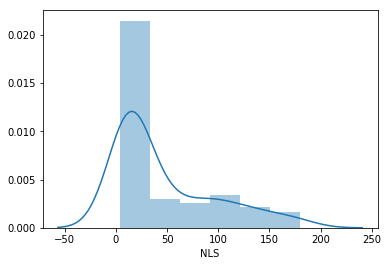

In [128]:
sns.distplot(data["NLS"])

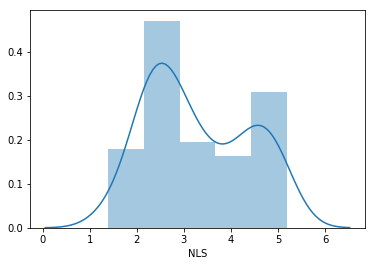

In [78]:
sns.distplot(np.log(data["NLS"]))